---
title: "Exploratory Data Exploration"
format:
  html:
      embed-resources: true
      code-fold: true
---

## Quick look at the data 

In [42]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt
import pandas as pd

# Apply the default theme
sns.set_theme(style="whitegrid", palette="pastel")

# Load an example dataset
bart_monthly = pd.read_csv('../data/cleaned_data/bart_monthly_ridership.csv')
wmata_monthly = pd.read_csv('../data/cleaned_data/wmata_monthly_ridership.csv')
combined_ridership = bart_monthly.merge(wmata_monthly, on='date')
combined_ridership = combined_ridership.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
combined_ridership = combined_ridership.rename(columns={'daily_entries': 'bart_ridership', 'avg_daily_entries': 'wmata_ridership'})
combined_ridership[['bart_ridership','wmata_ridership']].describe()
#combined_ridership.head()


bart_ridership  wmata_ridership
count       69.000000        69.000000
mean    218181.318841    290734.623188
std     153902.308664    176660.259728
min      25141.000000     30017.000000
25%      92401.000000    140034.000000
50%     149296.000000    237880.000000
75%     407339.000000    472304.000000
max     432971.000000    568265.000000

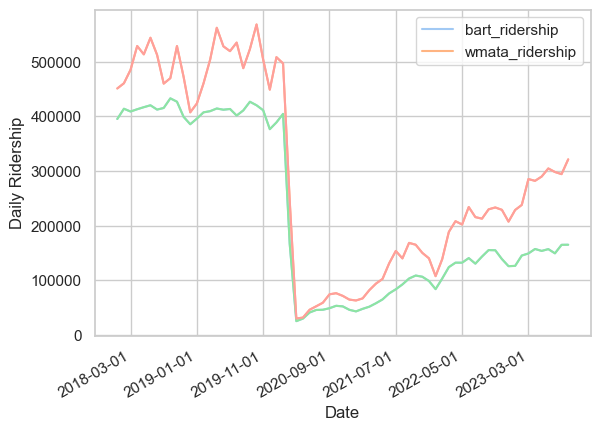

In [61]:
p = combined_ridership.plot()
p.plot(combined_ridership['date'], combined_ridership['bart_ridership'], label ='BART')
p.plot(combined_ridership['date'], combined_ridership['wmata_ridership'], label ='WMATA')
plt.xlabel("Date")
plt.ylabel("Daily Ridership")
p.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.show()

In [71]:
wfh_monthly = pd.read_csv('../data/cleaned_data/WFH_city_cleaned.csv')
wfh_monthly = wfh_monthly.drop(columns='Unnamed: 0')
wfh_monthly[['wfh_BayArea','wfh_WashingtonDC']].describe()

wfh_BayArea  wfh_WashingtonDC
count    35.000000         35.000000
mean     38.928571         36.657143
std       4.243789          4.792107
min      32.300000         30.000000
25%      36.050000         32.850000
50%      39.300000         37.900000
75%      41.500000         39.500000
max      54.200000         54.800000

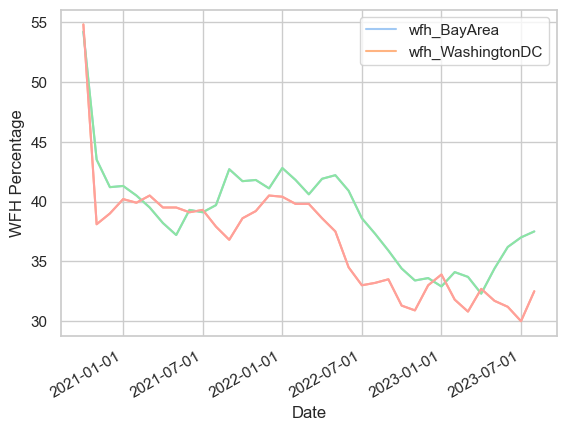

In [73]:
p1 = wfh_monthly.plot()
p1.plot(wfh_monthly['date'], wfh_monthly['wfh_BayArea'], label ='Bay Area')
p1.plot(wfh_monthly['date'], wfh_monthly['wfh_WashingtonDC'], label ='Washington D.C.')
plt.xlabel("Date")
plt.ylabel("WFH Percentage")
p1.xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gcf().autofmt_xdate()
plt.show()

                  bart_ridership  wmata_ridership  wfh_BayArea   
bart_ridership          1.000000         0.963119    -0.593388  \
wmata_ridership         0.963119         1.000000    -0.645030   
wfh_BayArea            -0.593388        -0.645030     1.000000   
wfh_WashingtonDC       -0.756827        -0.790434     0.869830   

                  wfh_WashingtonDC  
bart_ridership           -0.756827  
wmata_ridership          -0.790434  
wfh_BayArea               0.869830  
wfh_WashingtonDC          1.000000  


<Axes: >

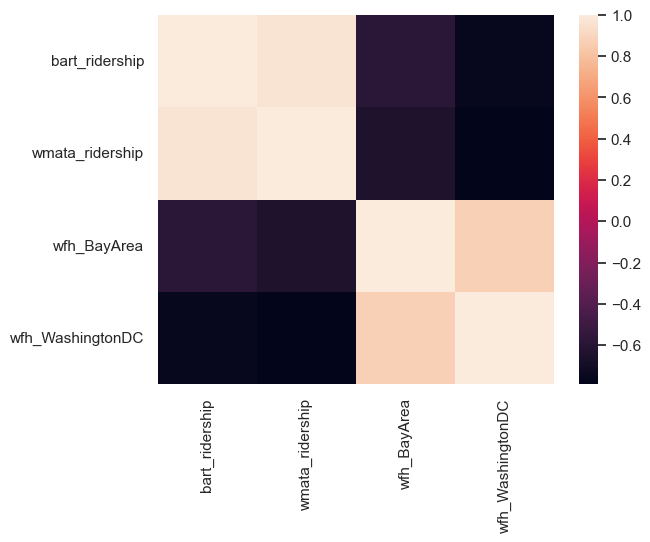

In [108]:
wfh_ridership = combined_ridership[33:67].merge(wfh_monthly, on='date')
wfh_ridership.head()
print(wfh_ridership.corr(method='pearson',numeric_only=True))
sns.heatmap(wfh_ridership.corr(numeric_only=True))

In [74]:
wfh_desires = pd.read_csv('../data/cleaned_data/WFH_surveys_cleaned.csv')
wfh_desires = wfh_desires.drop(columns='Unnamed: 0')
wfh_desires[['employer_desires_all','employer_desires_able','worker_desires_all','worker_desires_able']].describe()

employer_desires_all  employer_desires_able  worker_desires_all   
count             38.000000              37.000000           38.000000  \
mean               1.359211               2.045405            2.270526   
std                0.188628               0.278932            0.087763   
min                1.050000               1.560000            2.100000   
25%                1.177500               1.800000            2.190000   
50%                1.400000               2.210000            2.275000   
75%                1.530000               2.260000            2.320000   
max                1.610000               2.370000            2.470000   

       worker_desires_able  
count            37.000000  
mean              2.807568  
std               0.096650  
min               2.550000  
25%               2.770000  
50%               2.810000  
75%               2.870000  
max               2.970000

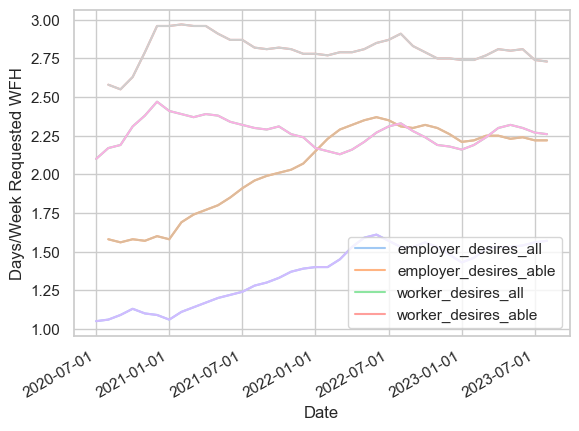

In [75]:
p2 = wfh_desires.plot()
p2.plot(wfh_desires['date'], wfh_desires['employer_desires_all'])
p2.plot(wfh_desires['date'], wfh_desires['employer_desires_able'])
p2.plot(wfh_desires['date'], wfh_desires['worker_desires_all'])
p2.plot(wfh_desires['date'], wfh_desires['worker_desires_able'])
plt.xlabel("Date")
plt.ylabel("Days/Week Requested WFH")
p2.xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gcf().autofmt_xdate()
plt.show()

In [95]:
hourly_pre = pd.read_csv('../data/cleaned_data/hourly_average_cleaned_pre-covid.csv')
hourly_post = pd.read_csv('../data/cleaned_data/hourly_average_cleaned_post-covid.csv')
combined_hourly = hourly_pre.merge(hourly_post, on='hour')
combined_hourly = combined_hourly.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','hour_numeric_x','hour_numeric_y','avg_daily_exits_x','avg_daily_exits_y'])
combined_hourly = combined_hourly.rename(columns={'avg_daily_entries_x': 'entries_pre_covid', 'avg_daily_entries_y': 'entries_post_covid'})
combined_hourly[['entries_pre_covid','entries_post_covid']].describe()
combined_hourly.head()


hour  entries_pre_covid  entries_post_covid
0  4:00 AM               1130                 518
1  5:00 AM               8585                3350
2  6:00 AM              21675                6671
3  7:00 AM              44715               11567
4  8:00 AM              58223               13408

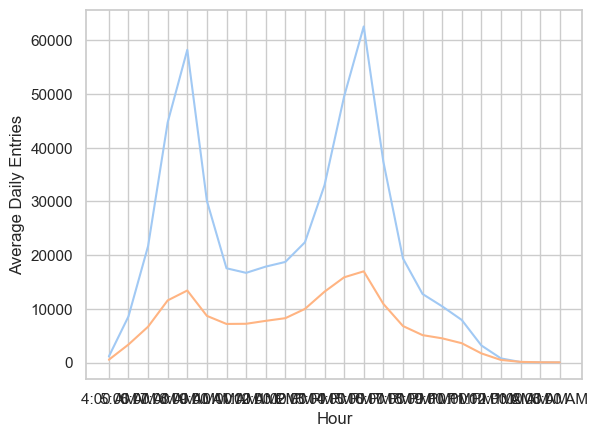

In [97]:
plt.plot(combined_hourly['hour'], combined_hourly['entries_pre_covid'])
plt.plot(combined_hourly['hour'], combined_hourly['entries_post_covid'])
plt.xlabel("Hour")
plt.ylabel("Average Daily Entries")
plt.show()

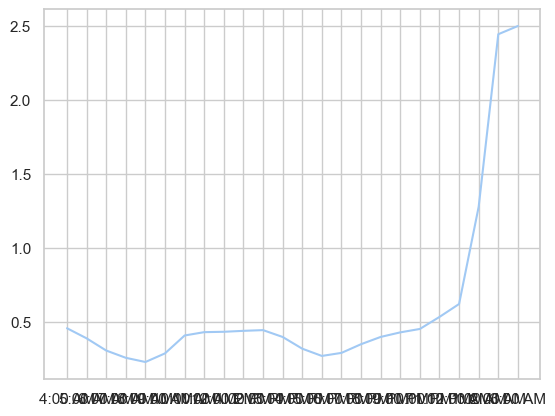

In [100]:
hourly_ratio = combined_hourly['entries_post_covid']/combined_hourly['entries_pre_covid']
plt.plot(combined_hourly['hour'], hourly_ratio)
plt.show()

In [93]:
ridership_type = pd.read_csv('../data/cleaned_data/ridership_by_quarter_cleaned.csv')
ridership_type = ridership_type.drop(columns='Unnamed: 0')
ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].describe()

total_ridership    heavy_rail     light_rail  commuter_rail   
count     5.300000e+01  5.300000e+01      53.000000      53.000000  \
mean      2.279058e+06  8.269957e+05  113075.698113  104419.962264   
std       5.826479e+05  2.299050e+05   30778.435641   32376.278023   
min       6.209250e+05  1.222490e+05   33137.000000   13521.000000   
25%       2.361673e+06  8.339910e+05  112616.000000  109741.000000   
50%       2.538958e+06  9.270570e+05  125865.000000  119043.000000   
75%       2.624985e+06  9.682590e+05  133233.000000  125486.000000   
max       2.729424e+06  1.015234e+06  140828.000000  130970.000000   

         trolleybus           bus  demand_response         other  
count     53.000000  5.300000e+01        53.000000     53.000000  
mean   19331.075472  1.125994e+06     47151.716981  42090.377358  
std     5935.076336  2.695039e+05     10558.336191  11875.951653  
min     3395.000000  4.205780e+05     16907.000000  11140.000000  
25%    19598.000000  1.133805e+06     46331.000000  40588.000000  
50%    21395.000000  1.234299e+06     51334.000000  45071.000000  
75%    23740.000000  1.312650e+06     53673.000000  49803.000000  
max    25051.000000  1.364993e+06     59535.000000  57254.000000

/Users/joshsweren/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


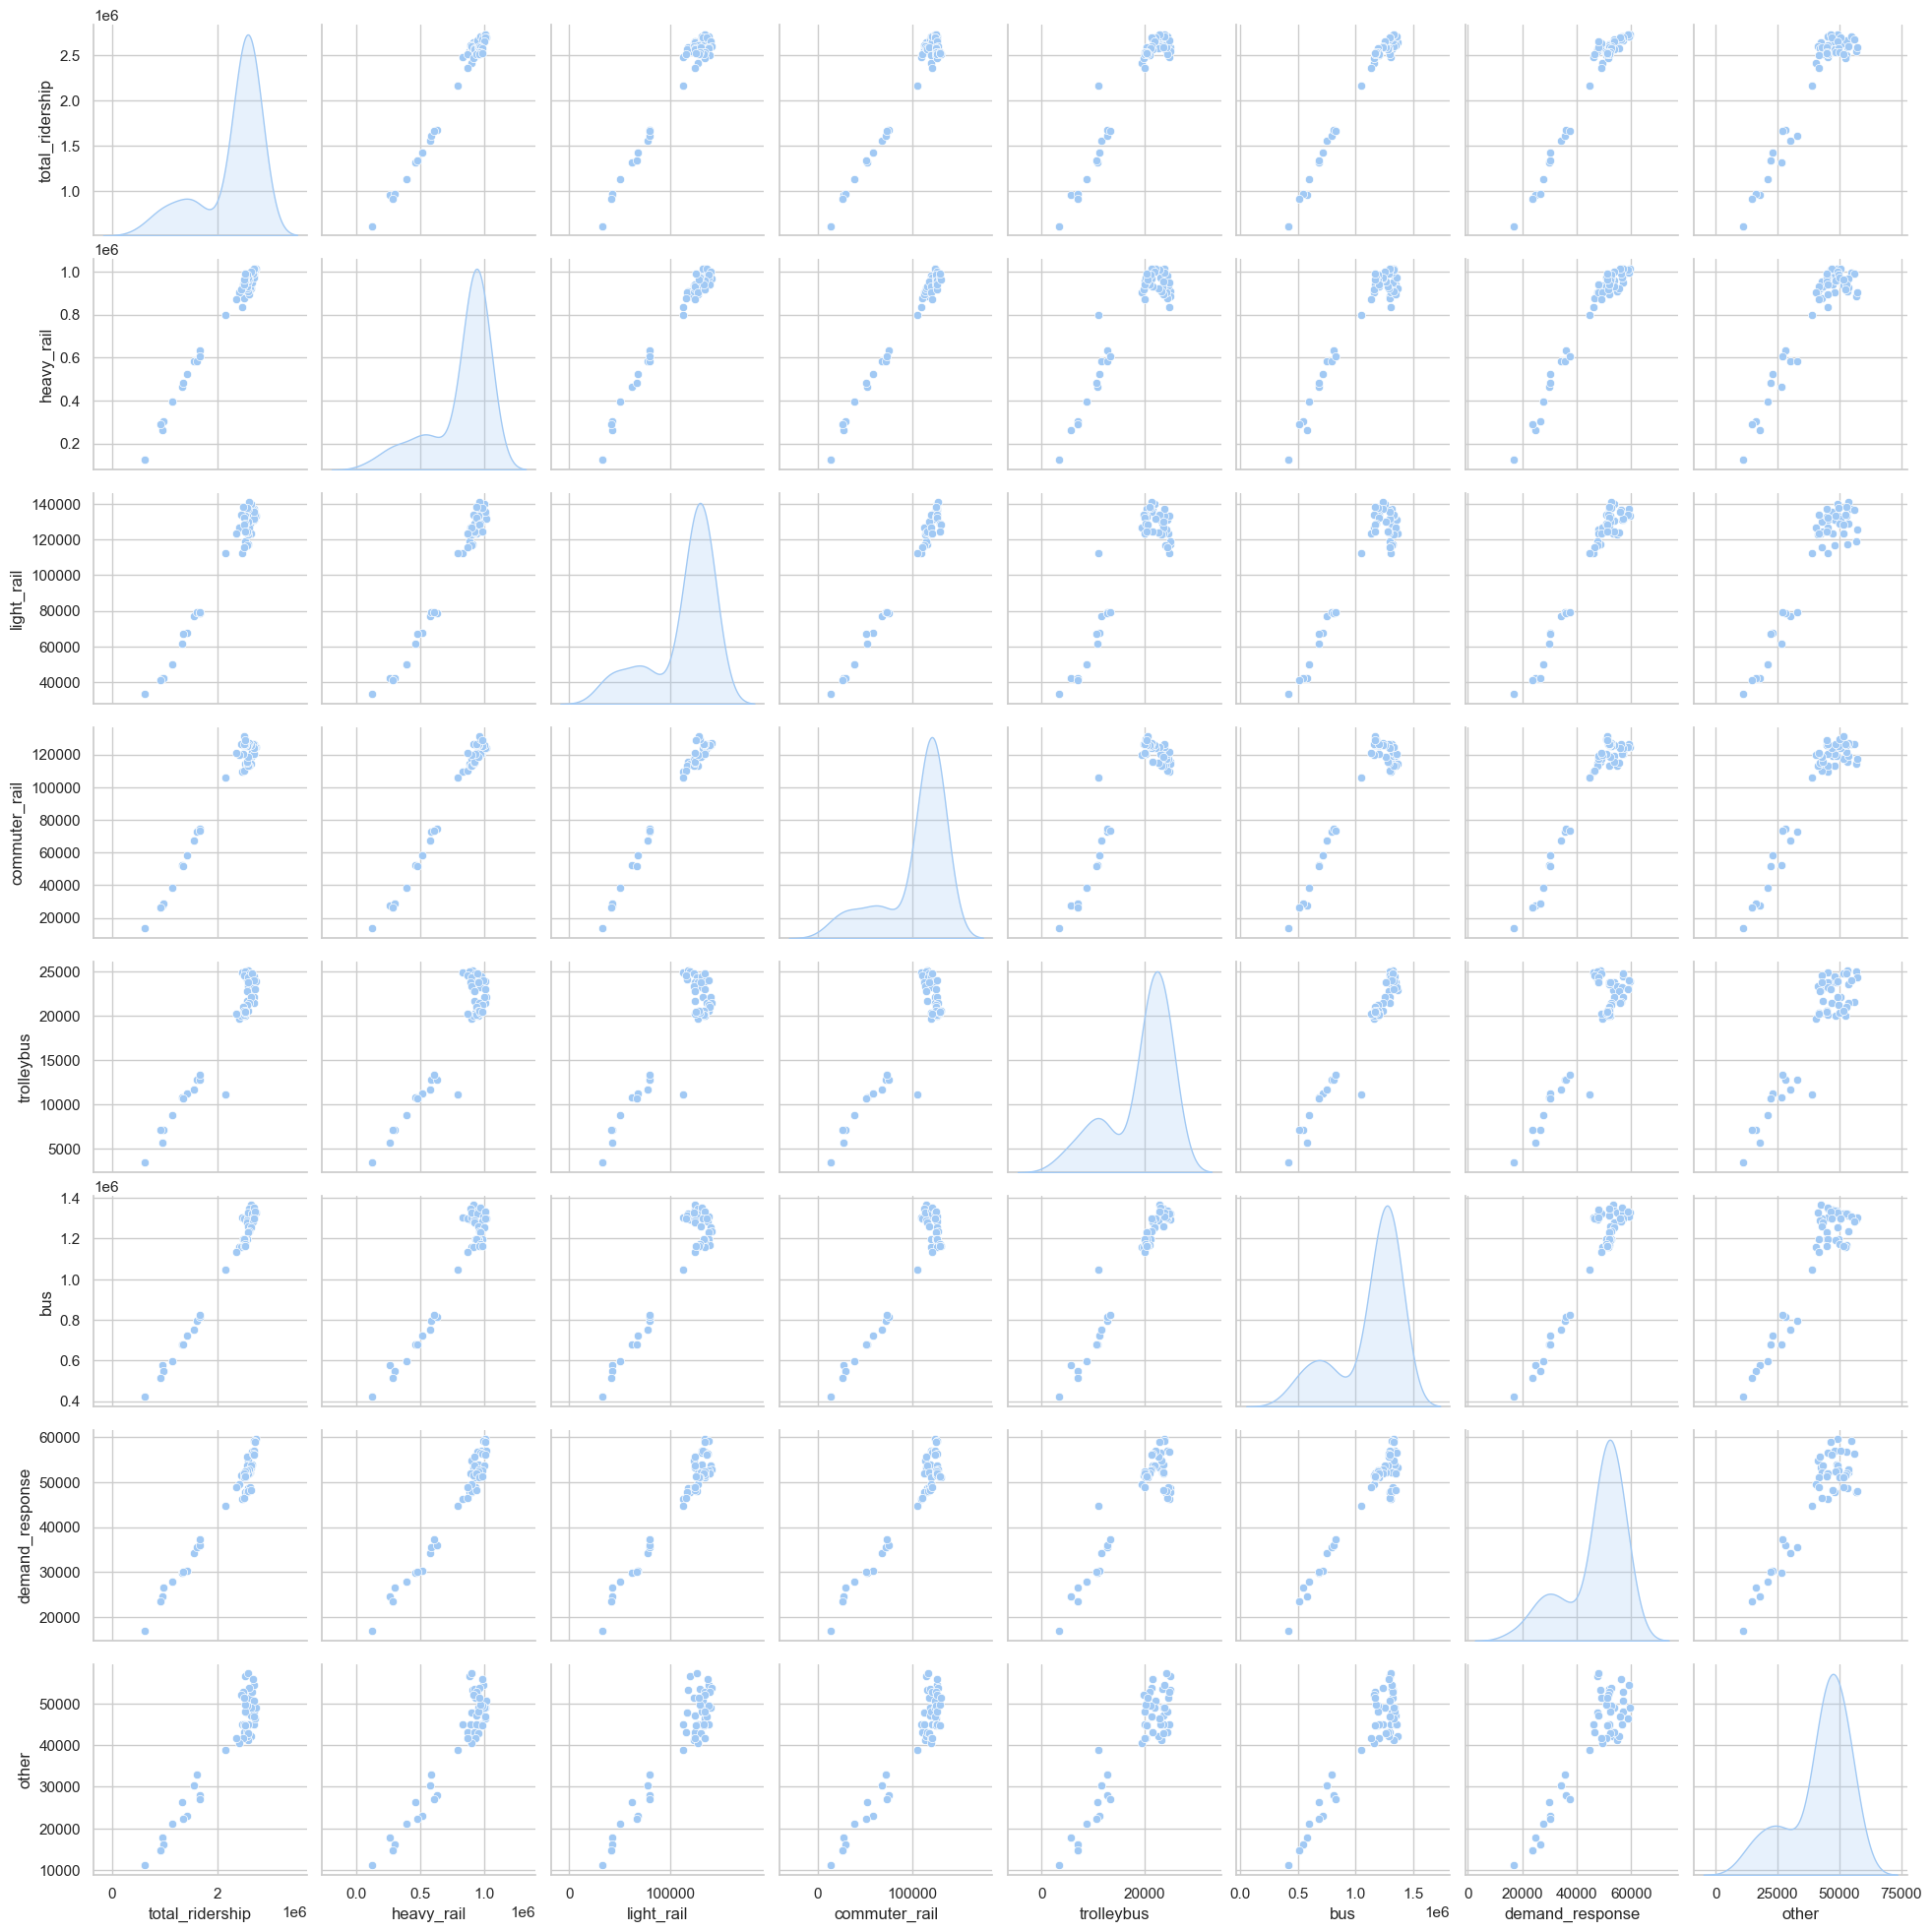

In [101]:
sns.pairplot(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']], diag_kind='kde', kind="scatter")

----------------------
PEARSON CORRELATION MATRIX:
----------------------
                 total_ridership  heavy_rail  light_rail  commuter_rail   
total_ridership         1.000000    0.989721    0.978829       0.979993  \
heavy_rail              0.989721    1.000000    0.987208       0.991768   
light_rail              0.978829    0.987208    1.000000       0.990598   
commuter_rail           0.979993    0.991768    0.990598       1.000000   
trolleybus              0.959039    0.923241    0.901781       0.906034   
bus                     0.987325    0.955084    0.941736       0.940388   
demand_response         0.975021    0.976711    0.971167       0.960878   
other                   0.941060    0.932013    0.933872       0.939074   

                 trolleybus       bus  demand_response     other  
total_ridership    0.959039  0.987325         0.975021  0.941060  
heavy_rail         0.923241  0.955084         0.976711  0.932013  
light_rail         0.901781  0.941736         0.9

<Axes: >

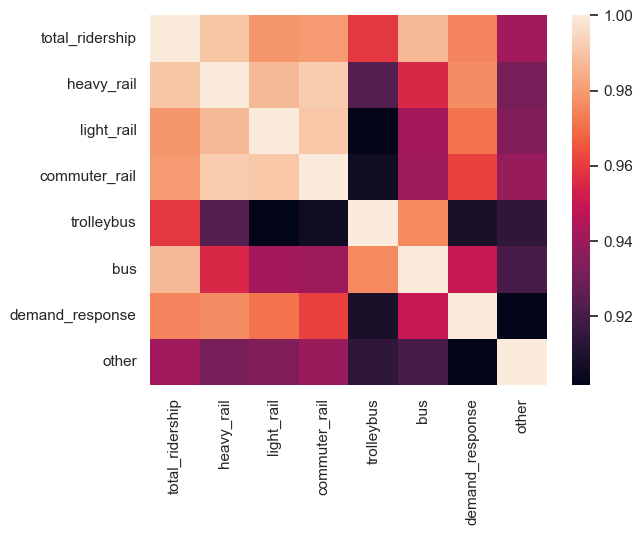

In [105]:
print(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].corr(method='pearson',numeric_only=True))
sns.heatmap(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].corr(numeric_only=True))

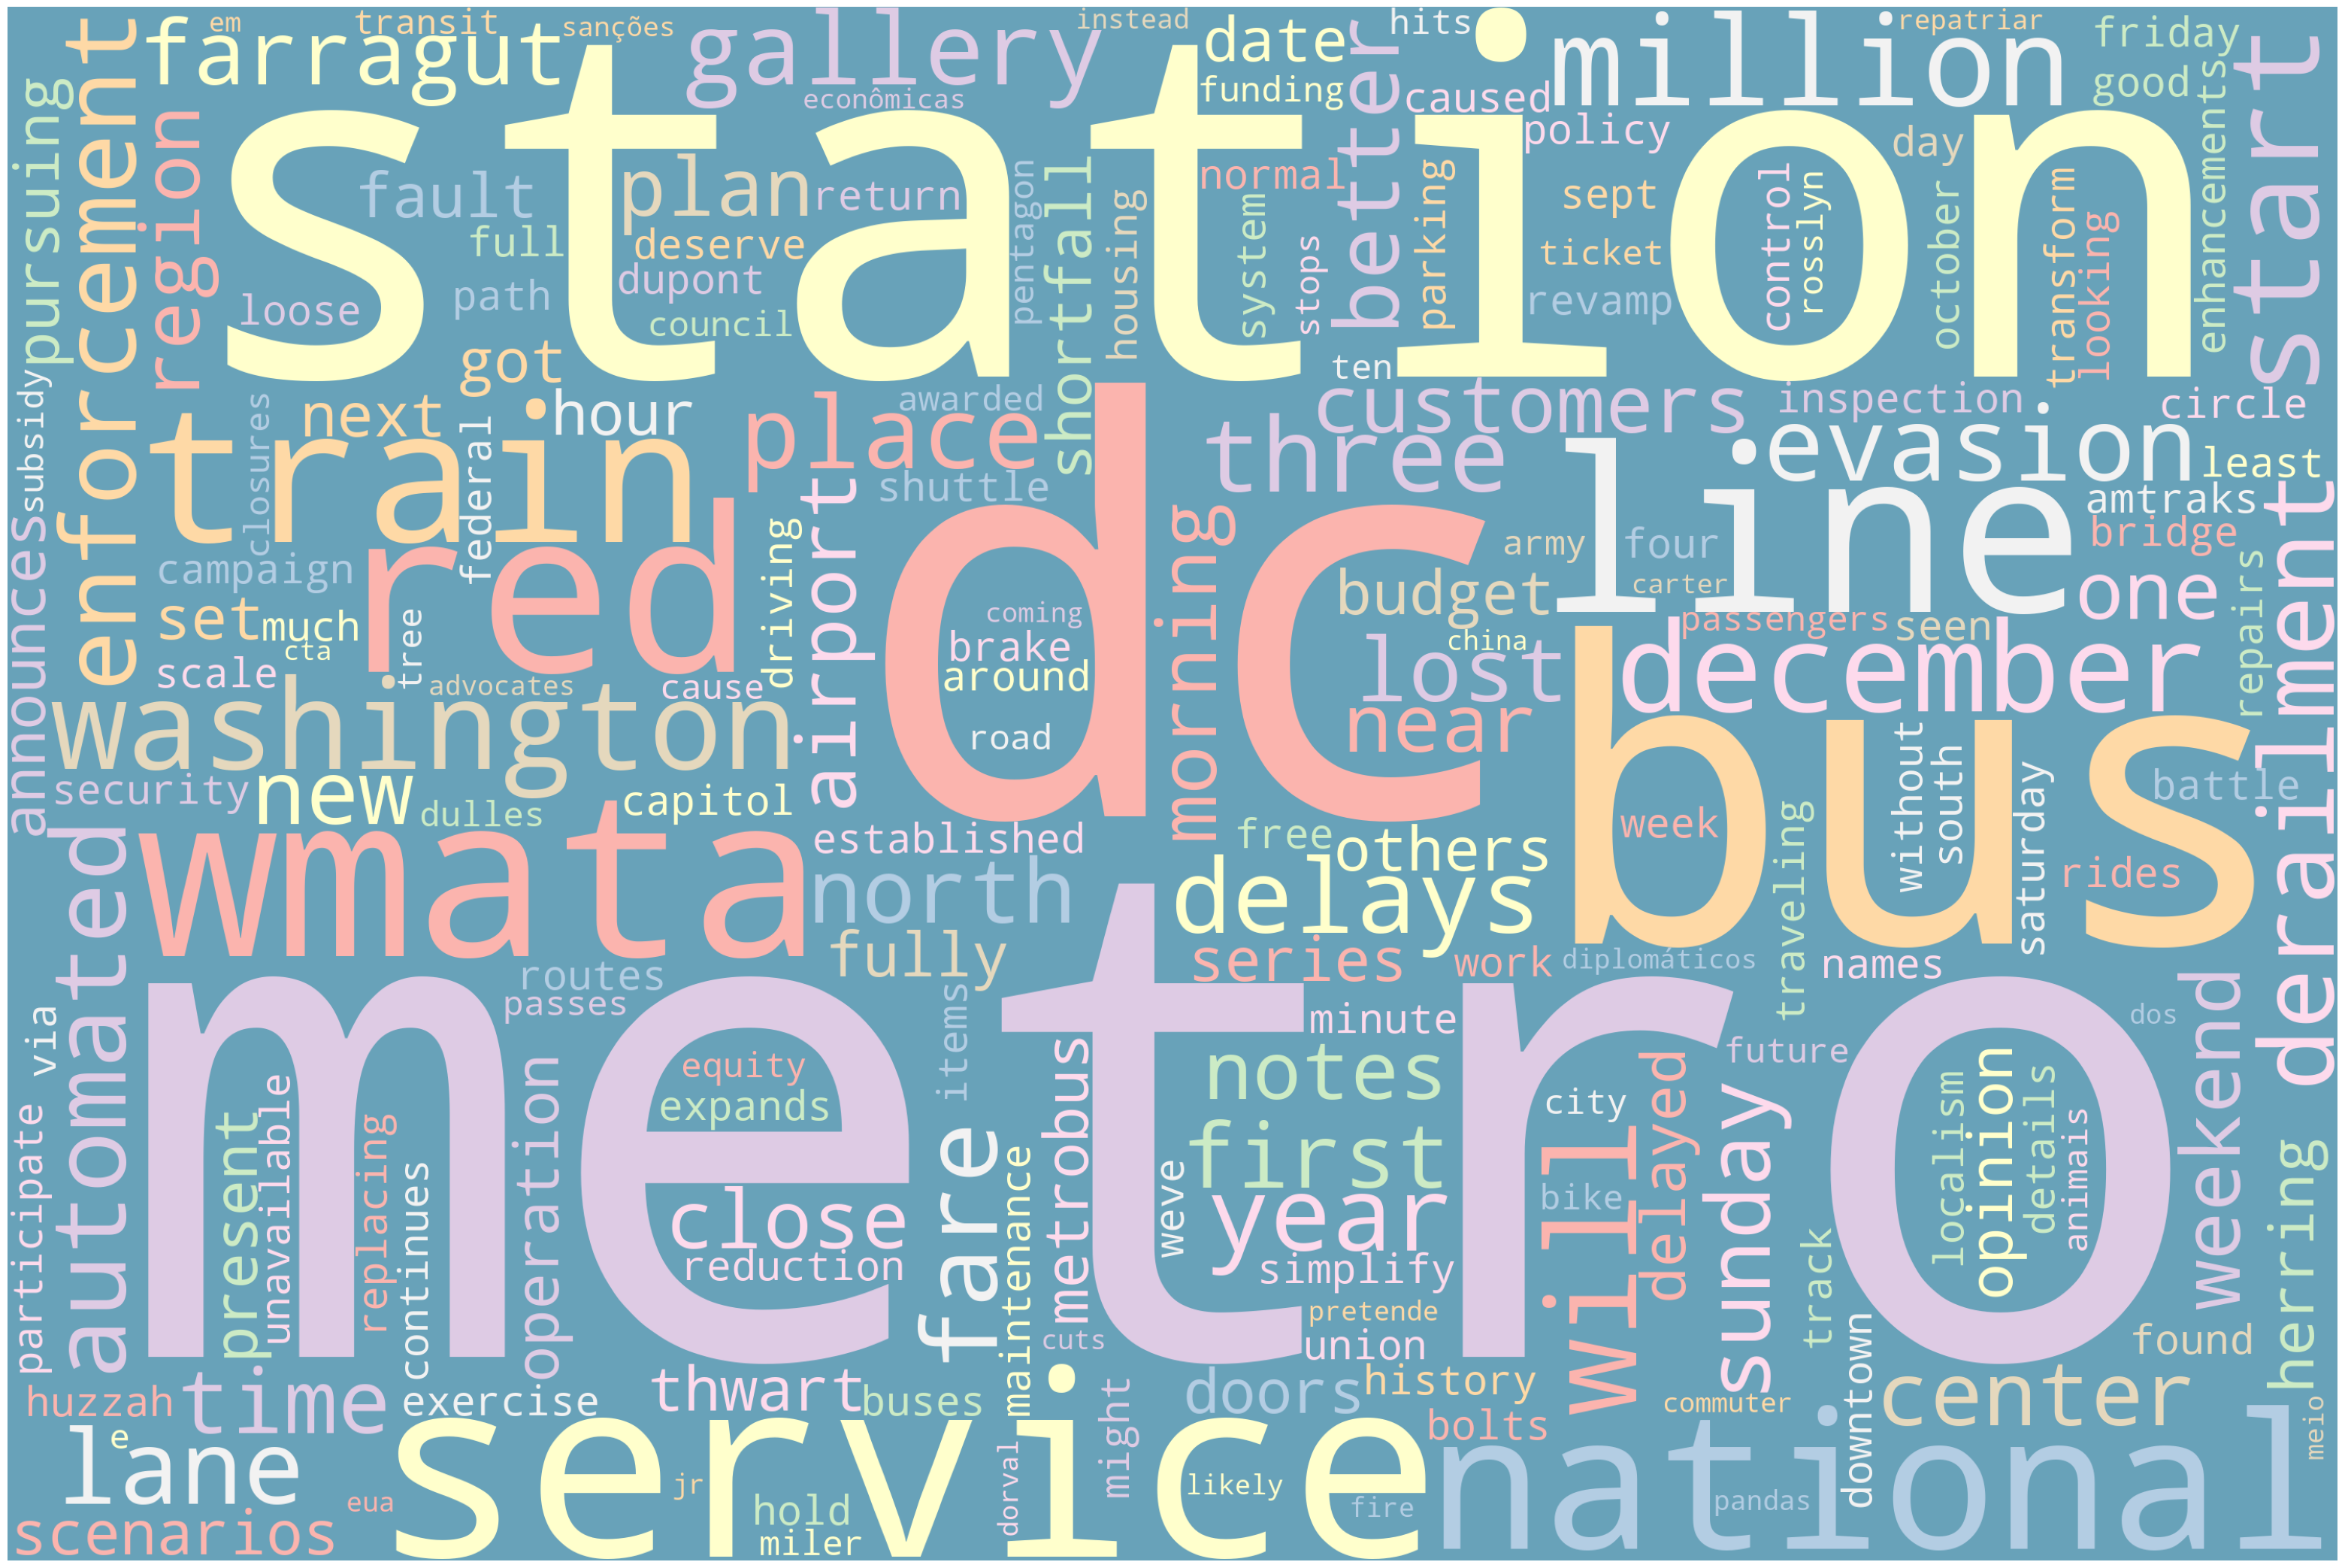

In [121]:
wmata_news = pd.read_csv('../data/cleaned_data/wmata_news_cleaned.csv')
bart_news = pd.read_csv('../data/cleaned_data/bart_news_cleaned.csv')
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt

    def plot_cloud(wordcloud):
        plt.figure(figsize=(40, 30))
        plt.imshow(wordcloud) 
        plt.axis("off")

    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='#68A2B9', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

wmata_text = " ".join(wmata_news['2']).replace('links','').replace('breakfast','')

generate_word_cloud(wmata_text)

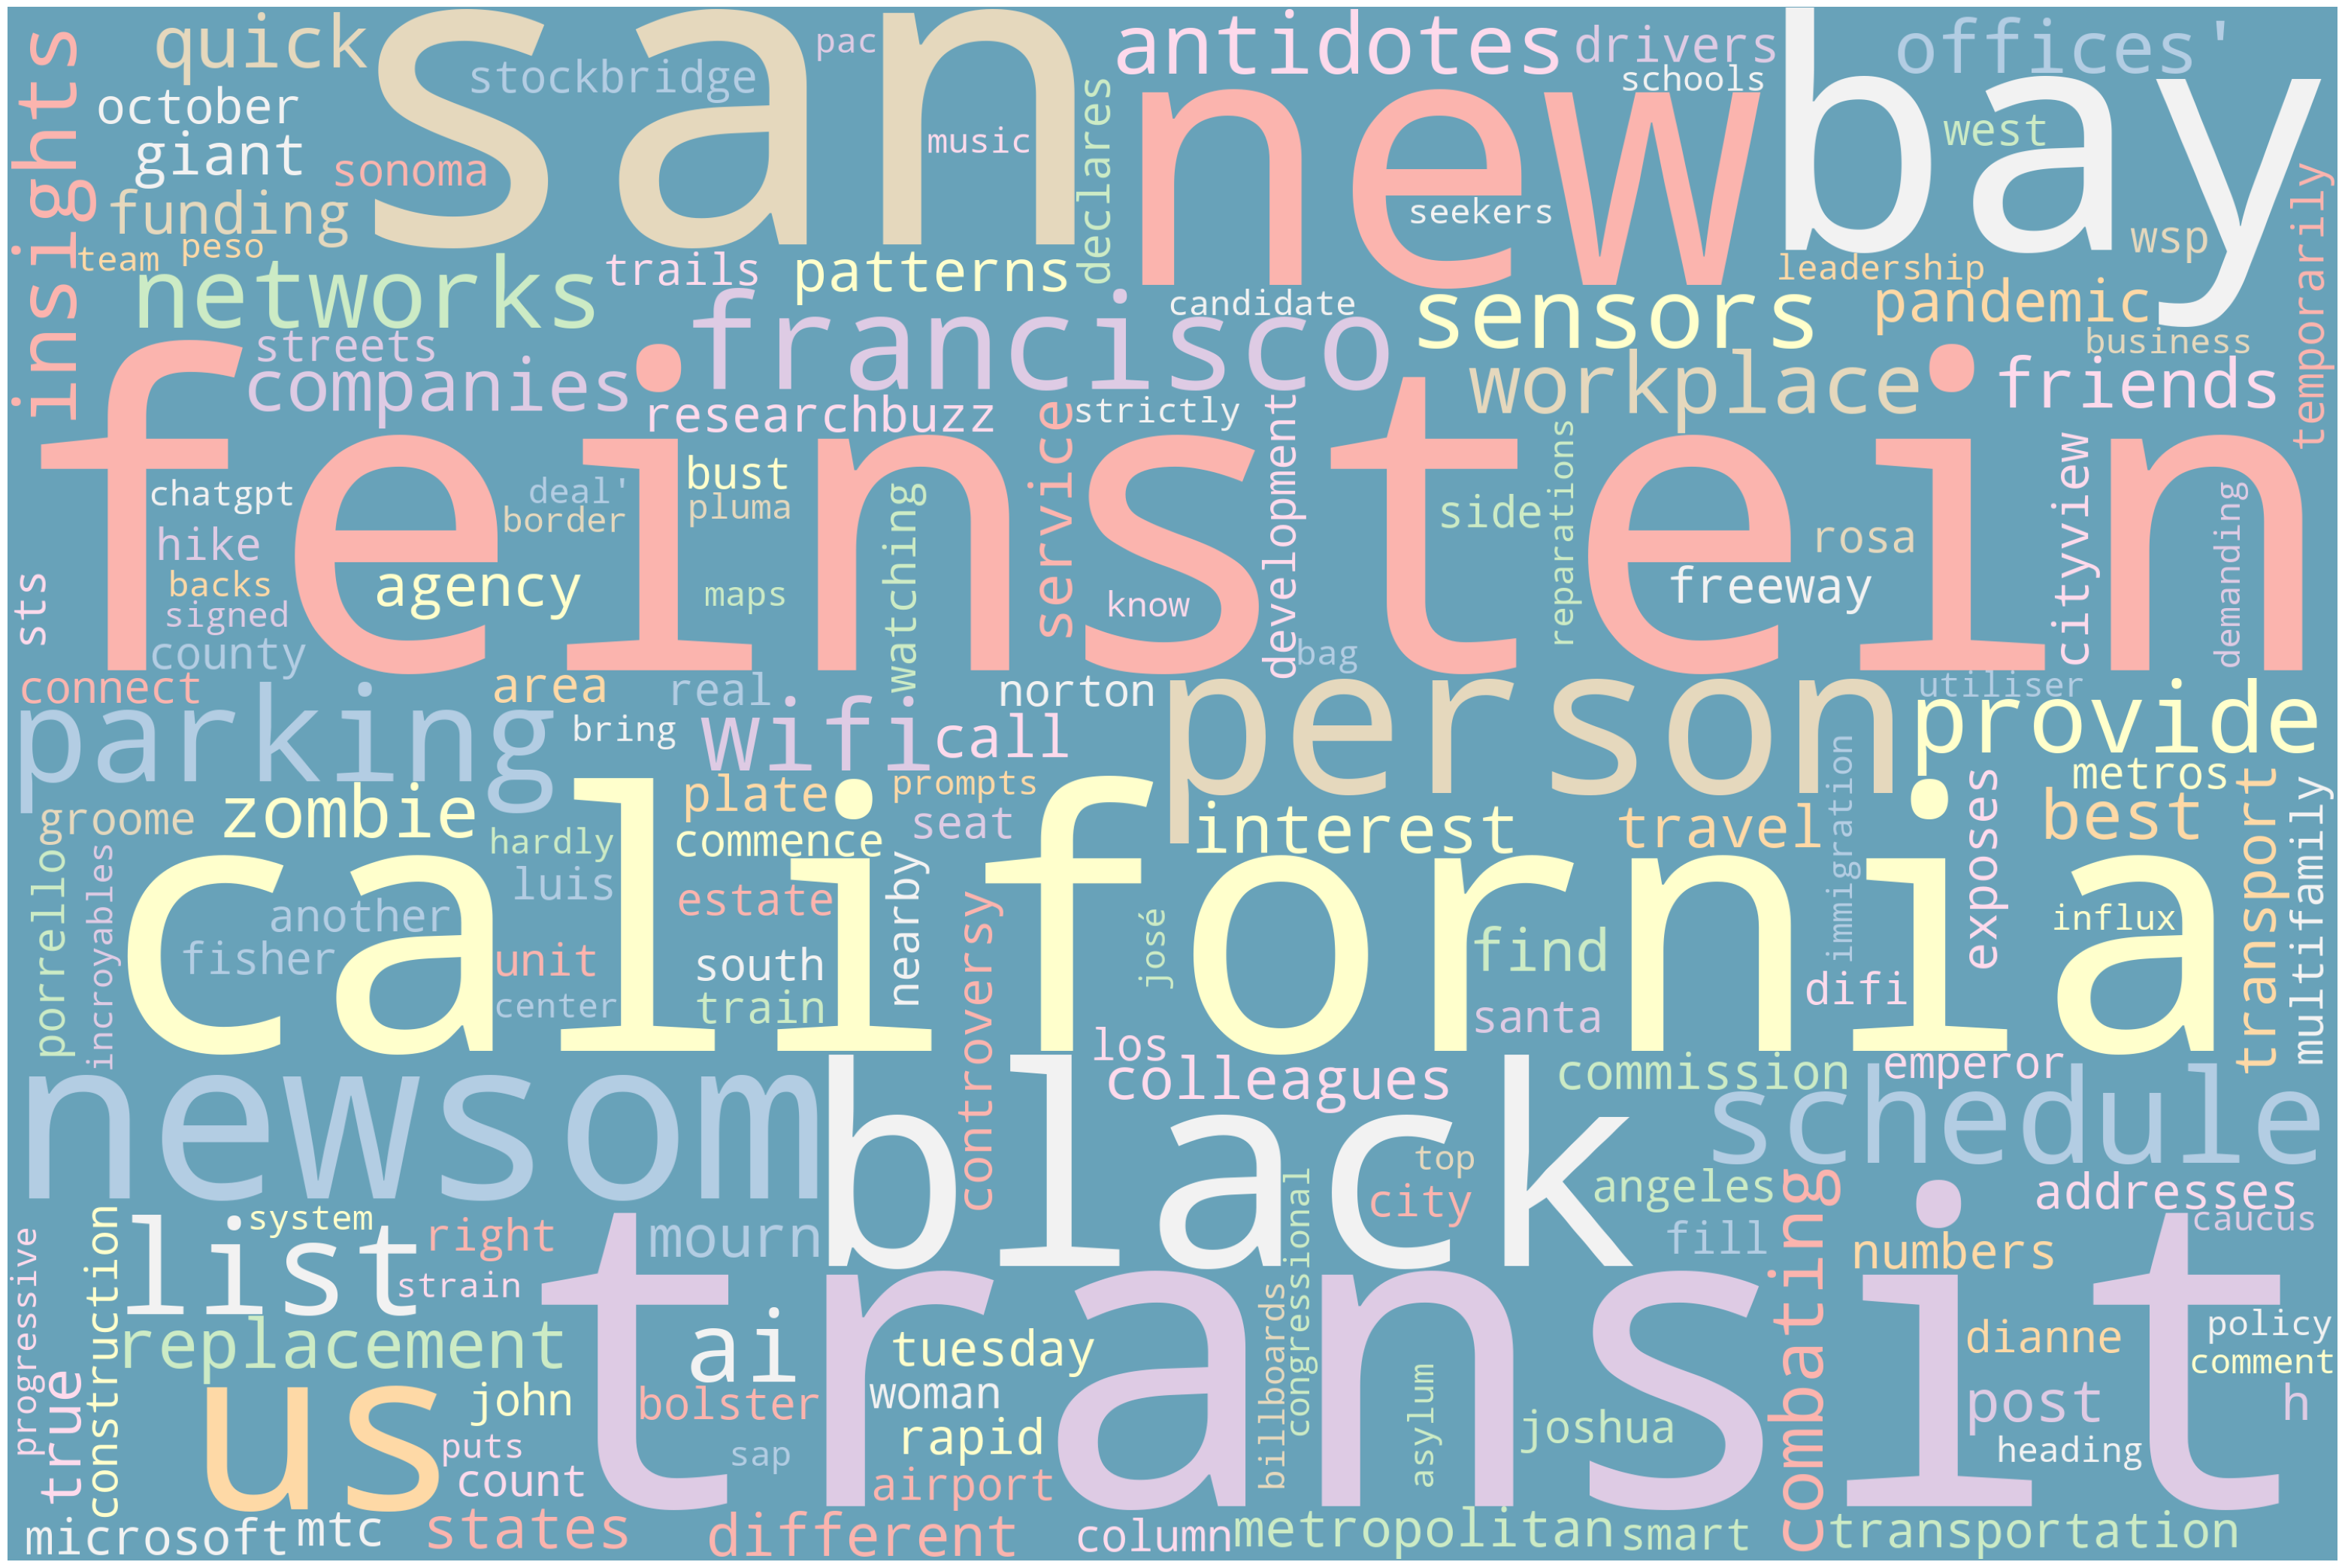

In [122]:
bart_text = " ".join(bart_news['2'])

generate_word_cloud(bart_text)

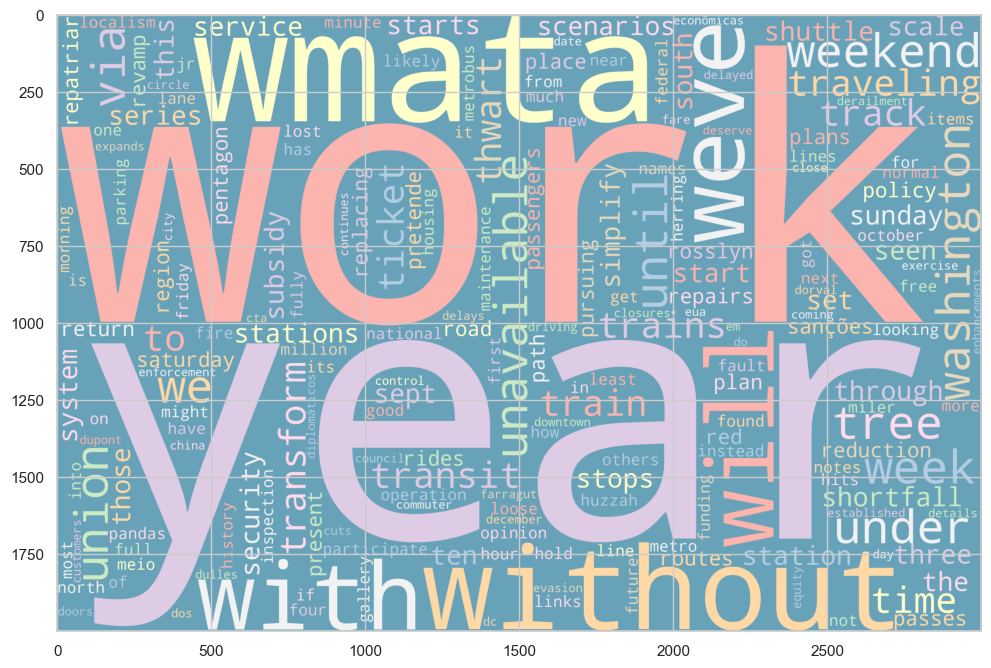

In [125]:
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wmata_text2 = open('../data/cleaned_data/wmata_vocabulary.json')
wmata_cloud2 = json.load(wmata_text2)
wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='#68A2B9', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate_from_frequencies(wmata_cloud2)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

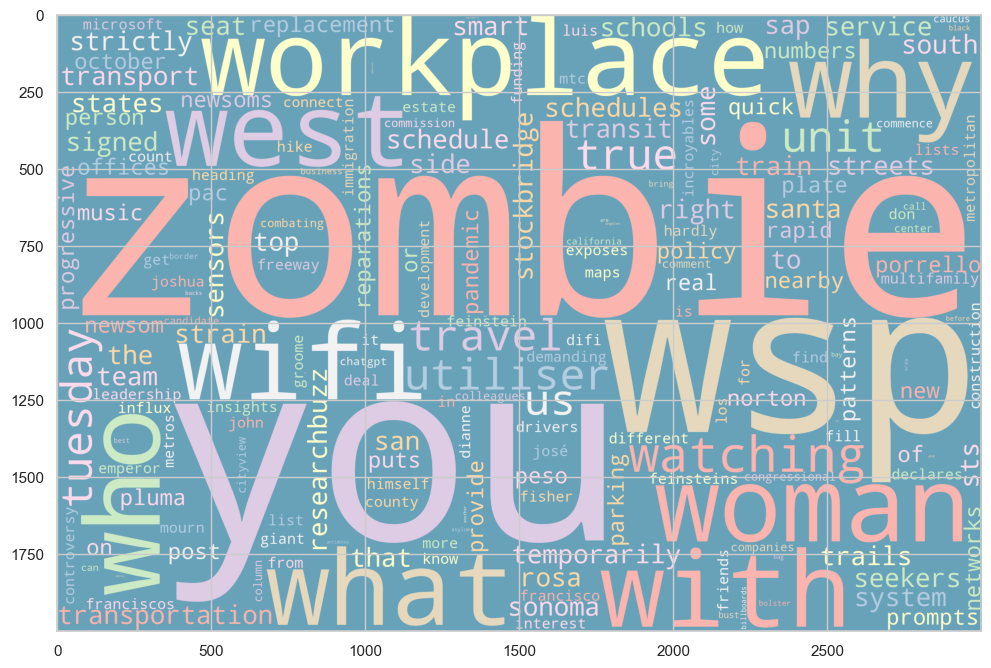

In [126]:
bart_text2 = open('../data/cleaned_data/bart_vocabulary.json')
bart_cloud2 = json.load(bart_text2)
wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='#68A2B9', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate_from_frequencies(bart_cloud2)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)